In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = (session.query(Measurement.date).
               order_by(Measurement.date.desc()).
               first())
recent_date

('2017-08-23',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

#source 01 to find timelines from certain dates
# Starting from the most recent data point in the database. 
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Calculate the date one year from the last date in data set.
last_year = dt.date(one_year.year, one_year.month, one_year.day)

# Perform a query to retrieve the data and precipitation scores
scores = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= last_year).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
data_df = pd.DataFrame(scores, columns=['date', 'precipitation'])

# Sort the dataframe by date
data_df.set_index(data_df['date'], inplace=True)

#look at data
# data_df

#drop na to clean data
clean_df = data_df.dropna()
# clean_df

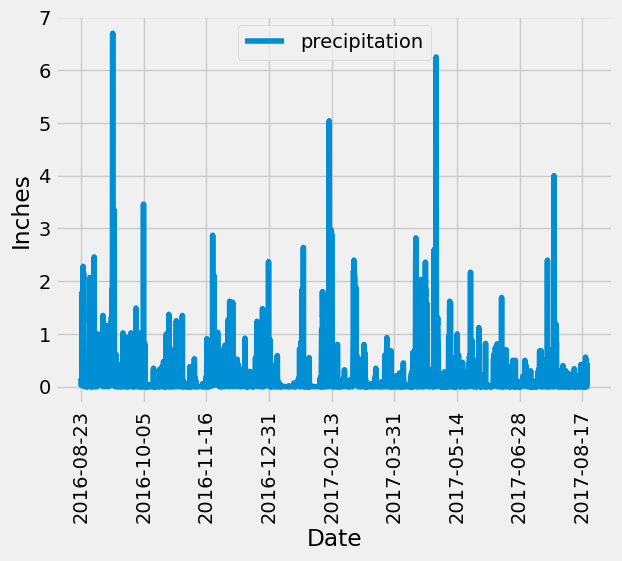

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
clean_df.plot('date', 'precipitation', grid=True)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(['precipitation'], loc='upper center')
plt.xticks(rotation=90)
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
clean_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
session.query(Measurement.station).distinct().count()

9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active = session.query(Measurement.station,
                       func.count(Measurement.station)).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc()).all()
active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Answer the following question: which station id has the greatest number of observations? -- USC00519281

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp = session.query(func.min(Measurement.tobs),
                     func.max(Measurement.tobs),
                     func.avg(Measurement.tobs)).\
                    filter(Measurement.station == 'USC00519281').all()
temp

[(54.0, 85.0, 71.66378066378067)]

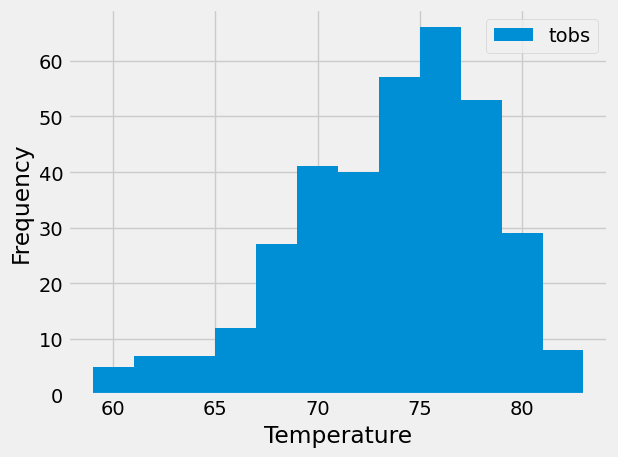

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
result_temp = session.query(Measurement.tobs).\
                filter(Measurement.station == 'USC00519281').\
                filter(Measurement.date >= one_year).all()

#find the correct data to graph
great_station_temp = pd.DataFrame(result_temp, columns = ['tobs'])

#plot graph
great_station_temp.plot.hist(bins=12, grid=True)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'], loc='upper right')
plt.tight_layout()
plt.show()

# Close Session

In [18]:
# Close Session
session.close()